# Dog Breed Identification:
This is the project from Kaggle's dog-breed-identification competition.
The data's are being used here from Kaggle's site provided for this competition. 
Downloded from 
https://www.kaggle.com/c/dog-breed-identification/data


In [2]:
### Import all relevent lib
import csv
import numpy as np
from PIL import Image
import os, os.path
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Dir
LABELS = 'data/labels.csv'
DATA_FILE = 'data/data.csv'
TRAIN_IMAGE_DIR = 'data/train/'
TEST_IMAGE_DIR = 'data/test/'
IMAGE_SIZE = 32,32
CHANNEL = 3
SIZE = 32
PIXEL_DEPTH = 255
# Model save path
save_model_path = './dog_breed_recognition'

print ('Lib imported successfully')



Lib imported successfully


In [3]:
def load_image_in_array( indirname, outfile ) :
    data = []
#    with open("./data/tmp.csv", 'w', newline='') as csvFile:
#                writer = csv.writer(csvFile, delimiter=',', quotechar='"')
      
    for root, dirs, fileList in os.walk(indirname, topdown=True):
         for fname in fileList:
#            for i in range(5):
#                if count > 5 :
#                    break
            f = os.path.join(root,fname)
            with open("./data/tmp.csv", 'a', newline='') as csvFile:
                writer = csv.writer(csvFile, delimiter=',', quotechar='"')
                #writer.writerow([str(fname)])
            img = Image.open(f)
            img.load()
            img = img.resize(IMAGE_SIZE, Image.ANTIALIAS)
            tmp = np.asarray( img, dtype="int32" )
            data.append(tmp)
#            display(img)
#            display(len(data))
            
    data = np.array(data)       
    return data 



In [4]:

def save_feature_in_csv(outfile, indata):
    read = list(csv.reader(open("data/tmp.csv", "r"), delimiter=" "))
    
    with open(outfile, 'w', newline='') as csvFile:
        writer = csv.writer(csvFile, delimiter=',', quotechar='"')
        writer.writerow(["Index" , "Feature", "Name"]) 
    with open(outfile, 'a', newline='') as csvFile :
        writer = csv.writer(csvFile, delimiter=',', quotechar='"')
        for i in range(indata.shape[0]):
            a = indata[i]
            b = str(read[i])
            read[i] = b[2:len(b)-6]
            writer.writerow([i+1,a,str(read[i])])
        
#read = list(csv.reader(open("data/tmp.csv", "r"), delimiter=" "))
#b = str(read[19])
#display(b)
#a = (b.replace('.jpg',''))
#a = b[2:len(b)-6]
#display(a)



In [17]:
label_dict = {}

def label_encoding(labels):
    # integer encode
    print(labels)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    print(integer_encoded[0])
    label_dict = dict(zip(integer_encoded,labels))
    #for i in range(len(integer_encoded)):
    #    label_dict.update({integer_encoded[i]:labels[i]})
    print(label_dict)   
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_label_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    print(onehot_label_encoded[0])
    return onehot_label_encoded
labels = np.loadtxt(open(LABELS, "rb"), dtype=str, delimiter=",", skiprows=1, usecols = 1)
label_encoding(labels)

['boston_bull' 'dingo' 'pekinese' ..., 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']
19
{19: 'boston_bull', 37: 'dingo', 85: 'pekinese', 15: 'bluetick', 49: 'golden_retriever', 10: 'bedlington_terrier', 18: 'borzoi', 7: 'basenji', 97: 'scottish_deerhound', 99: 'shetland_sheepdog', 113: 'walker_hound', 73: 'maltese_dog', 79: 'norfolk_terrier', 2: 'african_hunting_dog', 118: 'wire-haired_fox_terrier', 89: 'redbone', 68: 'lakeland_terrier', 21: 'boxer', 38: 'doberman', 83: 'otterhound', 106: 'standard_schnauzer', 58: 'irish_water_spaniel', 12: 'black-and-tan_coonhound', 26: 'cairn', 0: 'affenpinscher', 67: 'labrador_retriever', 55: 'ibizan_hound', 40: 'english_setter', 114: 'weimaraner', 48: 'giant_schnauzer', 54: 'groenendael', 36: 'dhole', 110: 'toy_poodle', 17: 'border_terrier', 109: 'tibetan_terrier', 80: 'norwegian_elkhound', 100: 'shih-tzu', 57: 'irish_terrier', 66: 'kuvasz', 46: 'german_shepherd', 53: 'greater_swiss_mountain_dog', 8: 'basset', 6: 'australian_terrier'

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [51]:
def feature_scaling(values):
    # Values are rescaled from [0, 255] down to [-0.5, 0.5]
    for i in range(values.shape[0]):
        values[i] = (values[i] - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    return values

In [52]:
def organise_data():
    # load the image data in to np array of size (no of image, 32, 32, 3)
    data = load_image_in_array(TRAIN_IMAGE_DIR, DATA_FILE)
    #display(data.shape)
    
    data = np.array(data, dtype=np.int32).flatten()
    #display(data.shape)
    # reshape the image into [image index, image_size*image_size*channels]
    jpgCounter = len(glob.glob1(TRAIN_IMAGE_DIR,"*.jpg"))
    
    data = data.reshape(jpgCounter,SIZE*SIZE*3)
    #display(data.shape)
    
    # save the data in /data/data.csv file
    save_feature_in_csv(DATA_FILE, data)
    
    return data
organise_data()

array([[165, 118,  66, ..., 167, 103,  70],
       [ 64,  36,  20, ...,  49,  24,  16],
       [ 96,  94,  91, ..., 115, 114, 111],
       ..., 
       [  1,   1,   1, ..., 185, 192, 196],
       [175, 169, 169, ..., 141, 141, 156],
       [176, 176, 178, ..., 203, 203, 203]])

In [7]:
def get_feature_label():
    labels = np.loadtxt(open(LABELS, "rb"), dtype=str, delimiter=",", skiprows=1, usecols = 1)
    features = organise_data()
    features = features.reshape(features.shape[0], SIZE, SIZE, CHANNEL)
    #features = np.loadtxt(open("data/data.csv", "rb"), dtype=int, delimiter=",", skiprows=1)
    display(labels.shape)
    onehot_label_encoded = label_encoding(labels)
    scaled_features = feature_scaling(features)
    display(onehot_label_encoded.shape)
    return scaled_features, onehot_label_encoded

In [85]:
def get_train_cv_test_data():
    features, labels = get_feature_label()
    #features = features.reshape(features.shape[0], SIZE, SIZE, CHANNEL)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features,
        labels,
        test_size=0.2,
        random_state=42)
    train_features, valid_features, train_labels, valid_labels = train_test_split(
        train_features,
        train_labels,
        test_size=0.1,
        random_state=42)
    
    return train_features, train_labels, valid_features, valid_labels, test_features, test_labels


    

In [86]:
train_features, train_labels, valid_features, valid_labels, test_features, test_labels = get_train_cv_test_data()

(10222,)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


(10222, 120)

In [87]:
train_features.shape, train_labels.shape, valid_features.shape, valid_labels.shape, test_features.shape, test_labels.shape

((7359, 32, 32, 3),
 (7359, 120),
 (818, 32, 32, 3),
 (818, 120),
 (2045, 32, 32, 3),
 (2045, 120))

In [ ]:
### CNN Model


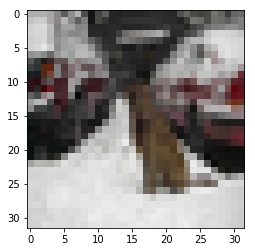

In [77]:
image = train_features[6000]
#display(image)
#img = np.reshape(image,newshape=(32,32,3))
img = img.astype(np.uint8)
plt.imshow(img) #load
plt.show()  # show the window



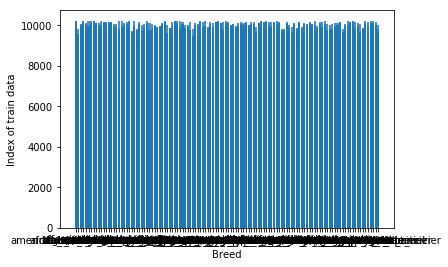

In [23]:
labels = np.loadtxt(open(LABELS, "rb"), dtype=str, delimiter=",", skiprows=1, usecols = 1)
features = np.loadtxt(open("data/data.csv", "rb"), dtype=int, delimiter=",", skiprows=1, usecols = 0)
#plt.figure(figsize=(120,50))
#plt.figure(1)
#plt.plot(labels,features, 'bo', markersize=20)
plt.bar(labels,features, alpha=0.8)
#plt.scatter(labels,features, c='r')
plt.xlabel("Breed")
plt.ylabel("Index of train data")
plt.legend()
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
